In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import plotly.express as px
import plotly.graph_objects as go
from colour import Color
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
#IMPORT DATASET
WaterPotability = pd.read_csv(r"C:\Users\NAJWA FAZLINI\Downloads\water_potability.csv")
WaterPotability

#As we can see here, the dataset contain 3276 rows with 10 columns. But, there are some missing number in rows. So, let's identify and remove it.

,ph,Hardness,Chloramines,Sulfate,Conductivity,Potability
0,NaN,204.89,7.30,368.52,564.31,0
1,3.72,129.42,6.64,NaN,592.89,0
2,8.10,224.24,9.28,NaN,418.61,0
3,8.32,214.37,8.06,356.89,363.27,0
4,9.09,181.10,6.55,310.14,398.41,0
...,...,...,...,...,...,...
3271,4.67,193.68,7.17,359.95,526.42,1
3272,7.81,193.55,8.06,NaN,392.45,1
3273,9.42,175.76,7.35,NaN,432.04,1
3274,5.13,230.60,6.30,NaN,402.88,1


In [5]:
# LET'S GET THE IDEA ABOUT THIS DATASET FIRST
info = WaterPotability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ph            2785 non-null   float64
 1   Hardness      3276 non-null   float64
 2   Chloramines   3276 non-null   float64
 3   Sulfate       2495 non-null   float64
 4   Conductivity  3276 non-null   float64
 5   Potability    3276 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 153.7 KB


In [7]:
#CLEANING
#1. Identify and remove missing numbers
MissingNo = WaterPotability. isna().sum() #this is used to see how many missing number in each column
MissingNo 

ph              491
Hardness          0
Chloramines       0
Sulfate         781
Conductivity      0
Potability        0
dtype: int64

In [9]:
RemoveMissingNo = WaterPotability.dropna() #missing values in columns are removed
RemoveMissingNo

,ph,Hardness,Chloramines,Sulfate,Conductivity,Potability
3,8.32,214.37,8.06,356.89,363.27,0
4,9.09,181.10,6.55,310.14,398.41,0
5,5.58,188.31,7.54,326.68,280.47,0
6,10.22,248.07,7.51,393.66,283.65,0
7,8.64,203.36,4.56,303.31,474.61,0
...,...,...,...,...,...,...
3267,8.99,215.05,6.30,312.93,390.41,1
3268,6.70,207.32,7.71,304.51,329.27,1
3269,11.49,94.81,9.26,258.93,439.89,1
3270,6.07,186.66,7.75,345.70,415.89,1


In [11]:
# 2. To identify duplicate rows 
DuplicateRows = WaterPotability.duplicated().sum()
DuplicateRows

0

In [13]:
# Rename 'RemoveMissingNo' into CleanedData
CleanedData = RemoveMissingNo
CleanedData

,ph,Hardness,Chloramines,Sulfate,Conductivity,Potability
3,8.32,214.37,8.06,356.89,363.27,0
4,9.09,181.10,6.55,310.14,398.41,0
5,5.58,188.31,7.54,326.68,280.47,0
6,10.22,248.07,7.51,393.66,283.65,0
7,8.64,203.36,4.56,303.31,474.61,0
...,...,...,...,...,...,...
3267,8.99,215.05,6.30,312.93,390.41,1
3268,6.70,207.32,7.71,304.51,329.27,1
3269,11.49,94.81,9.26,258.93,439.89,1
3270,6.07,186.66,7.75,345.70,415.89,1


In [15]:
# To describe the dataset
describe = CleanedData.describe()
describe

,ph,Hardness,Chloramines,Sulfate,Conductivity,Potability
count,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000
mean,7.083823,195.920175,7.125870,333.312911,425.979282,0.400284
std,1.586302,32.760794,1.589135,41.083470,80.724152,0.490072
min,0.230000,47.430000,1.390000,129.000000,201.620000,0.000000
25%,6.090000,176.832500,6.120000,307.707500,365.847500,0.000000
50%,7.030000,197.100000,7.140000,332.480000,423.155000,0.000000
75%,8.060000,216.120000,8.110000,359.270000,481.545000,1.000000
max,14.000000,317.340000,13.130000,481.030000,753.340000,1.000000


In [17]:
# CHANGE ALL Capital letter in columns to small letter
# Convert column names to snake_case
import re
def to_snake(name):
    name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    name = re.sub(r'\s+', '', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()

CleanedData.columns = map(to_snake, CleanedData.columns)
CleanedData.columns

Index(['ph', 'hardness', 'chloramines', 'sulfate', 'conductivity',
       'potability'],
      dtype='object')

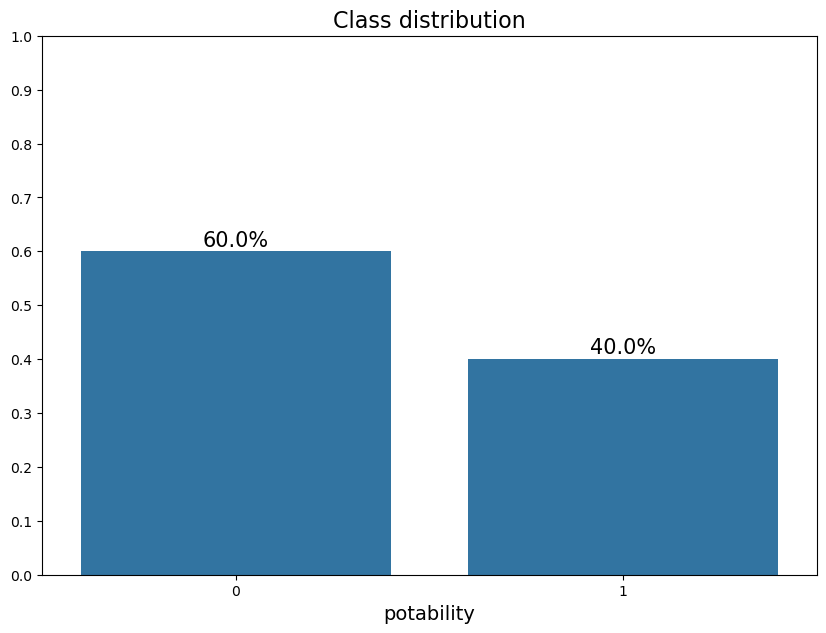

In [19]:
# TO VISUALIZE THE CLASS DISTRIBUTION FOR POTABILITY
plt.figure(figsize=(10,7))
ax = sns.barplot(x="potability", y="potability", data=CleanedData, estimator=lambda x: len(x) / len(CleanedData))

#Anotating the graph
for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
               y+height+0.01, 
               '{:.1%}'.format(height), 
               horizontalalignment='center',fontsize=15)

plt.xlabel('potability', fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.1))
ax.yaxis.label.set_visible(False)
plt.title('Class distribution', fontsize=16)
plt.show()

# From class distribution, we can see that this dataset is unbalanced.

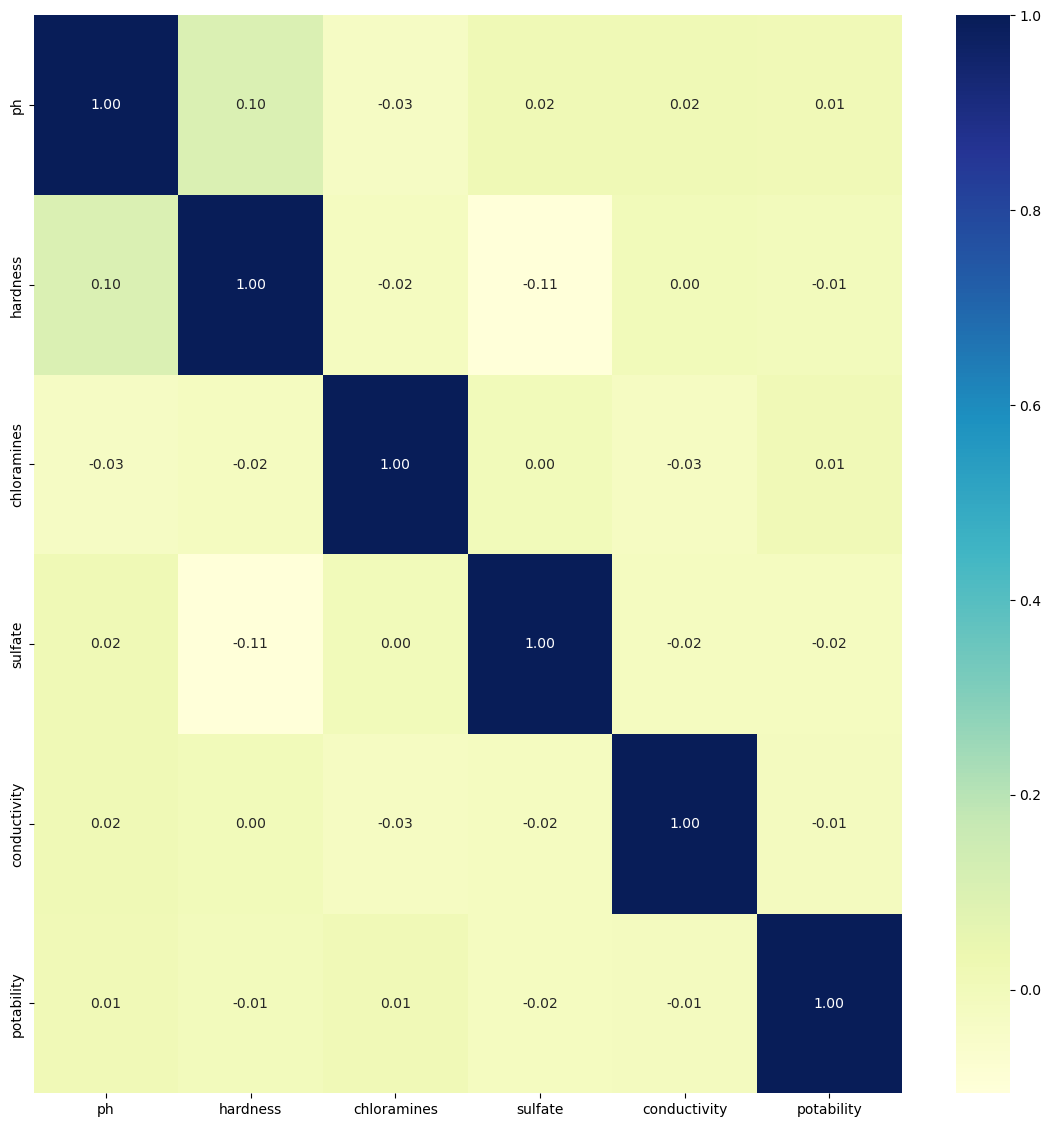

In [21]:
# Plot heatmap to see the correlation between features 
plt.figure(figsize = (14, 14))
sns.heatmap(CleanedData.corr(), cmap='YlGnBu', annot = True, fmt='.2f');

C:\Users\NAJWA FAZLINI\AppData\Local\Temp\ipykernel_6496\3713522456.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


<Figure size 1400x600 with 0 Axes>

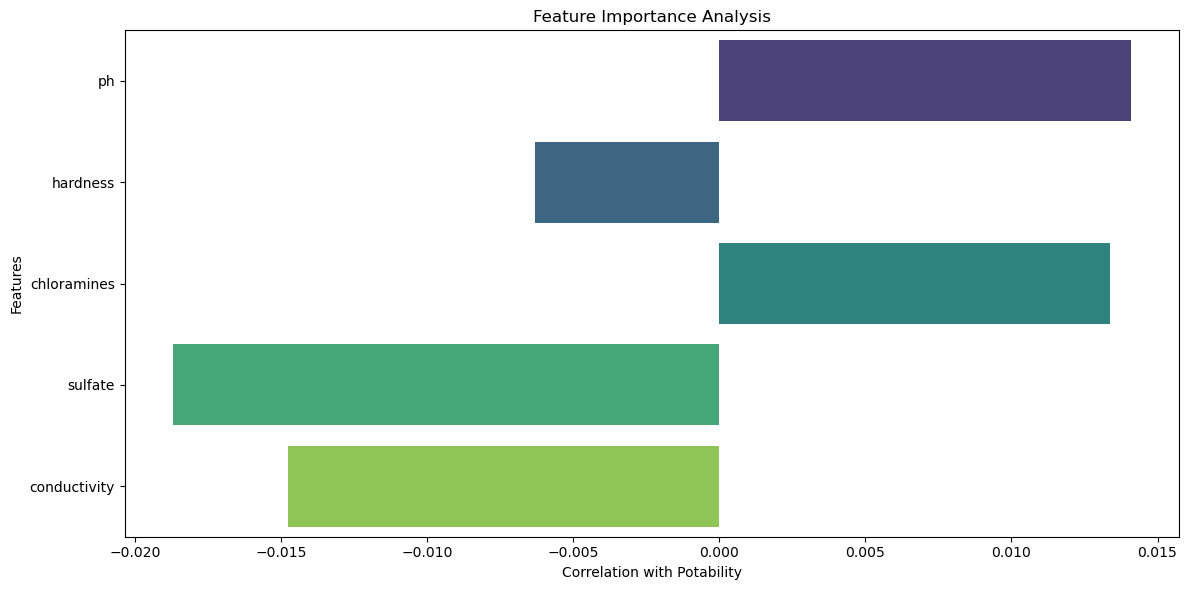

In [89]:
# Plot bar graph for feature importance
# From feature importance, we can see which features are affecting the train and test model
plt.figure(figsize = (14, 6))

features = ['ph', 'hardness', 'chloramines', 'sulfate', 'conductivity']
correlations = CleanedData[features].corrwith(CleanedData['potability'])

feature_importance = correlations.reset_index()
feature_importance.columns = ['Feature', 'Importance']

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance Analysis')
plt.xlabel('Correlation with Potability')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [25]:
# TRAIN AND TEST 
X = CleanedData[['ph','hardness','chloramines','sulfate','conductivity']]
y = CleanedData['potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clfs = ["KNN", "SVM", "Decision Tree", "Random Forest", "Gaussian N-B", "Logistic Regression", "Gradient Boosting"]
acc_res = []
pre_res = []
rec_res = []
f1_res = []

def get_results(model_name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Get the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{model_name} results:")
    cm_display = ConfusionMatrixDisplay(cm).plot()
    plt.show()
    
    # Get the scores
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print the results
    print(f"- Accuracy score: {acc:.4f}")
    print(f"- Precision score: {pre:.4f}")
    print(f"- Recall score: {rec:.4f}")
    print(f"- F1 score: {f1:.4f}")
    print()
    
    return acc, pre, rec, f1

KNN results:


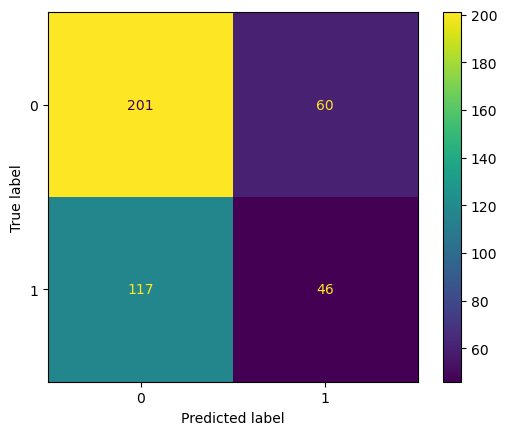

- Accuracy score: 0.5825
- Precision score: 0.4340
- Recall score: 0.2822
- F1 score: 0.3420



In [27]:
# lET'S START WITH KNN CLASSIFIERS 
acc_knn, pre_knn, rec_knn, f1_knn = get_results("KNN", KNeighborsClassifier(), X_train, X_test, y_train, y_test)

acc_res.append(acc_knn)
pre_res.append(pre_knn)
rec_res.append(rec_knn)
f1_res.append(f1_knn)

SVM results:


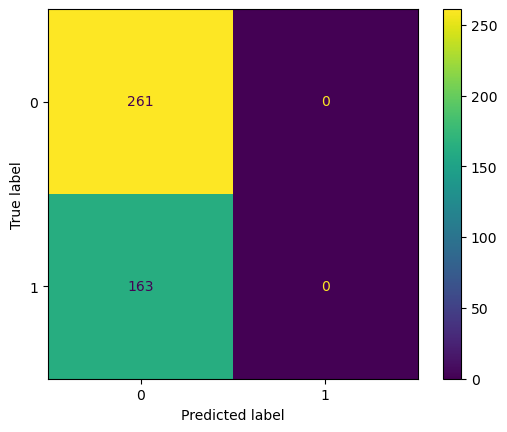

C:\Users\NAJWA FAZLINI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- Accuracy score: 0.6156
- Precision score: 0.0000
- Recall score: 0.0000
- F1 score: 0.0000

Decision Tree results:


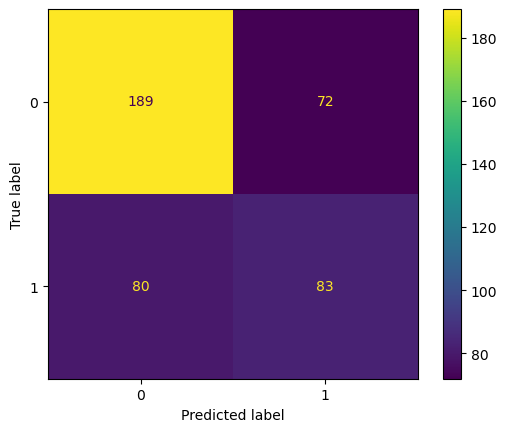

- Accuracy score: 0.6415
- Precision score: 0.5355
- Recall score: 0.5092
- F1 score: 0.5220

Random Forest results:


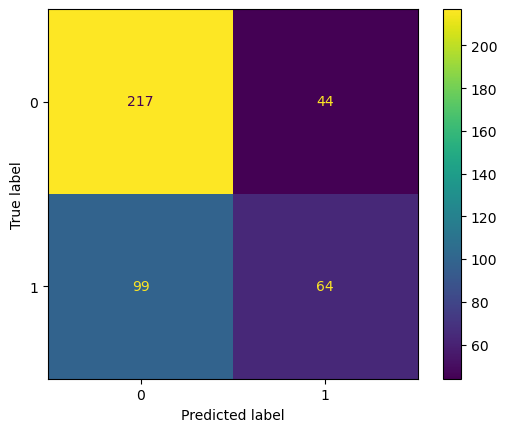

- Accuracy score: 0.6627
- Precision score: 0.5926
- Recall score: 0.3926
- F1 score: 0.4723

Gaussian N-B results:


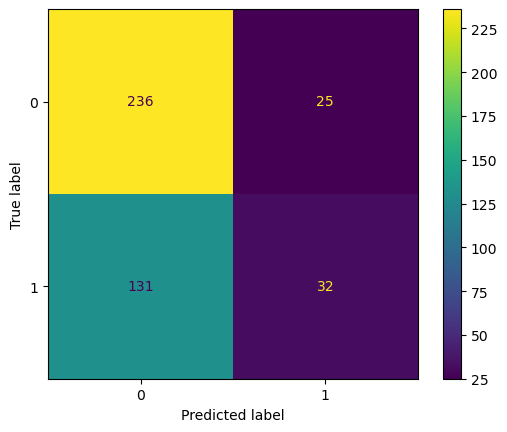

- Accuracy score: 0.6321
- Precision score: 0.5614
- Recall score: 0.1963
- F1 score: 0.2909

Logistic Regression results:


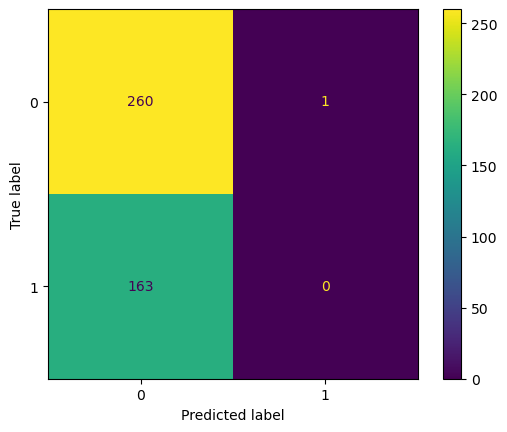

- Accuracy score: 0.6132
- Precision score: 0.0000
- Recall score: 0.0000
- F1 score: 0.0000

Gradient Boosting results:


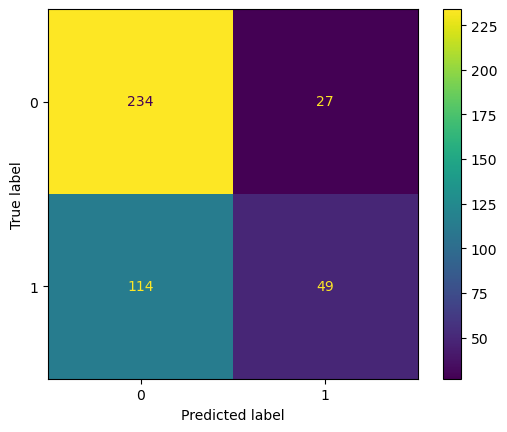

- Accuracy score: 0.6675
- Precision score: 0.6447
- Recall score: 0.3006
- F1 score: 0.4100



,Classifiers,F1 Score,Accuracy,Precision,Recall
0,KNN,0.342007,0.582547,0.433962,0.282209
1,SVM,0.000000,0.615566,0.000000,0.000000
2,Decision Tree,0.522013,0.641509,0.535484,0.509202
3,Random Forest,0.472325,0.662736,0.592593,0.392638
4,Gaussian N-B,0.290909,0.632075,0.561404,0.196319
5,Logistic Regression,0.000000,0.613208,0.000000,0.000000
6,Gradient Boosting,0.410042,0.667453,0.644737,0.300613


In [29]:
models = {
            "SVM" : svm.SVC(random_state=42),
            "Decision Tree" : DecisionTreeClassifier(random_state=42),
            "Random Forest" : RandomForestClassifier(random_state=42),
            "Gaussian N-B" : GaussianNB(),
            "Logistic Regression" : LogisticRegression(random_state=42),
            "Gradient Boosting" : GradientBoostingClassifier(random_state=42)
         }


for key in models:
    acc, pre, rec, f1 = get_results(key, models[key], X_train, X_test, y_train, y_test)
    acc_res.append(acc)
    pre_res.append(pre)
    rec_res.append(rec)
    f1_res.append(f1)


df_res = pd.DataFrame({'Classifiers':clfs, 'F1 Score':f1_res, 'Accuracy':acc_res, 'Precision':pre_res, 'Recall':rec_res})
df_res

KNN results:


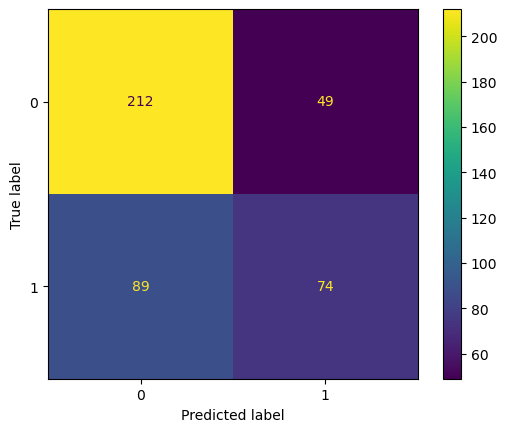

- Accuracy score: 0.6745
- Precision score: 0.6016
- Recall score: 0.4540
- F1 score: 0.5175

SVM results:


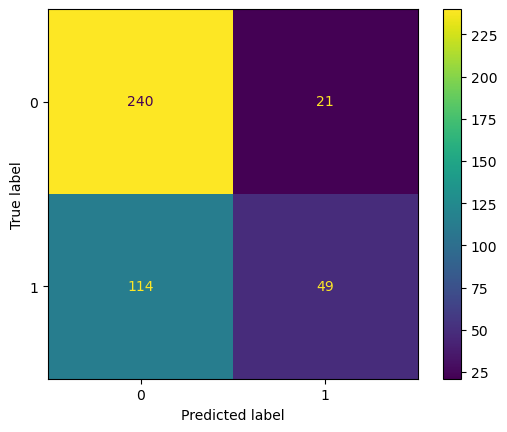

- Accuracy score: 0.6816
- Precision score: 0.7000
- Recall score: 0.3006
- F1 score: 0.4206

Decision Tree results:


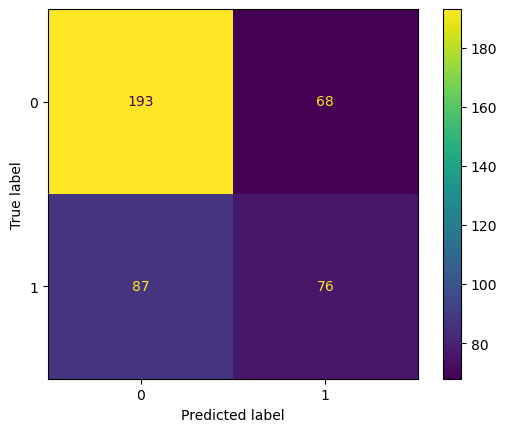

- Accuracy score: 0.6344
- Precision score: 0.5278
- Recall score: 0.4663
- F1 score: 0.4951

Random Forest results:


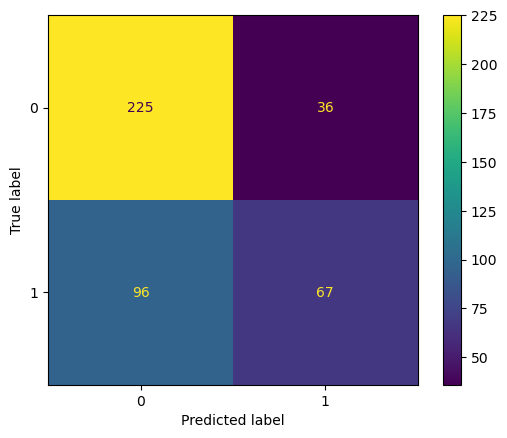

- Accuracy score: 0.6887
- Precision score: 0.6505
- Recall score: 0.4110
- F1 score: 0.5038

Gaussian N-B results:


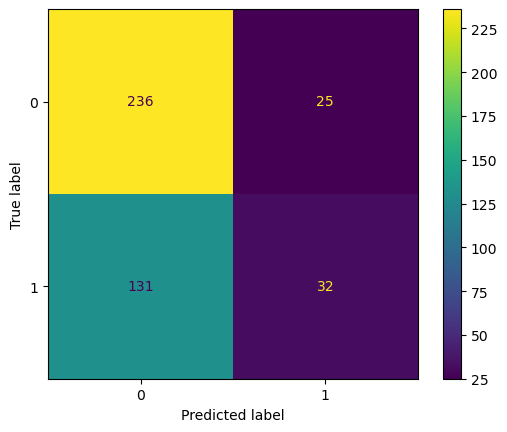

- Accuracy score: 0.6321
- Precision score: 0.5614
- Recall score: 0.1963
- F1 score: 0.2909

Logistic Regression results:


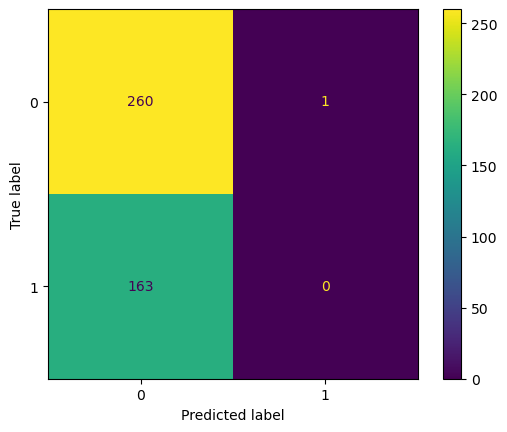

- Accuracy score: 0.6132
- Precision score: 0.0000
- Recall score: 0.0000
- F1 score: 0.0000

Gradient Boosting results:


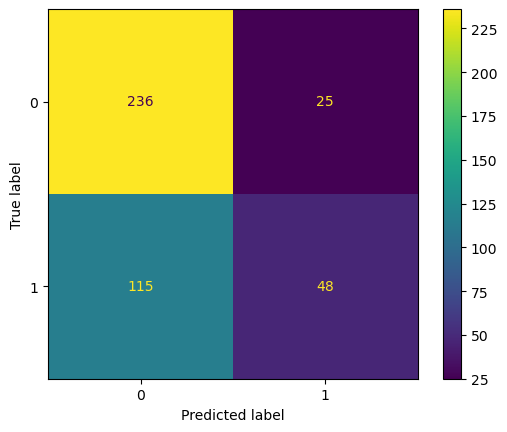

- Accuracy score: 0.6698
- Precision score: 0.6575
- Recall score: 0.2945
- F1 score: 0.4068



,Classifiers,Unaltered features,Standardized features
0,KNN,0.342007,0.517483
1,SVM,0.000000,0.420601
2,Decision Tree,0.522013,0.495114
3,Random Forest,0.472325,0.503759
4,Gaussian N-B,0.290909,0.290909
5,Logistic Regression,0.000000,0.000000
6,Gradient Boosting,0.410042,0.406780


In [31]:
# From above results, we can see the accuracy is not high enough. But, I will try to improve the accuracy using StandardScaler and SMOTE.
# First, using StandardScaler
X_norm = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
acc_std_res = []
pre_std_res = []
rec_std_res = []
f1_std_res = []
models = {
            "KNN" : KNeighborsClassifier(),
            "SVM" : svm.SVC(),
            "Decision Tree" : DecisionTreeClassifier(),
            "Random Forest" : RandomForestClassifier(),
            "Gaussian N-B" : GaussianNB(),
            "Logistic Regression" : LogisticRegression(),
            "Gradient Boosting" : GradientBoostingClassifier()
         }


for key in models:
    acc, pre, rec, f1 = get_results(key, models[key], X_train, X_test, y_train, y_test)
    acc_std_res.append(acc)
    pre_std_res.append(pre)
    rec_std_res.append(rec)
    f1_std_res.append(f1)


df_f1_comp = pd.DataFrame({'Classifiers':clfs, 'Unaltered features':f1_res, 'Standardized features':f1_std_res})
df_f1_comp

In [35]:
# Using SMOTE 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
counter = Counter(y_train)
print(counter)
print(f"Class 0 elements: {counter[0]/(counter[0]+counter[1])*100:.2f} %")
print(f"Class 1 elements: {counter[1]/(counter[0]+counter[1])*100:.2f} %")

Counter({0: 1008, 1: 684})
Class 0 elements: 59.57 %
Class 1 elements: 40.43 %


In [39]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train_over)
print(counter)
print(f"Class 0 elements: {counter[0]/(counter[0]+counter[1])*100:.2f} %")
print(f"Class 1 elements: {counter[1]/(counter[0]+counter[1])*100:.2f} %")

Counter({1: 1008, 0: 1008})
Class 0 elements: 50.00 %
Class 1 elements: 50.00 %


In [77]:
acc_over_res = []
pre_over_res = []
rec_over_res = []
f1_over_res = []

KNN results:


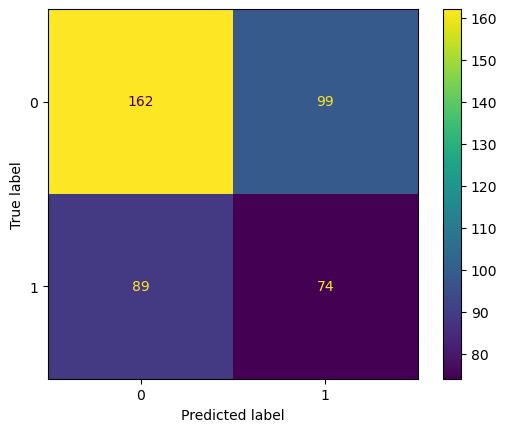

- Accuracy score: 0.5566
- Precision score: 0.4277
- Recall score: 0.4540
- F1 score: 0.4405

SVM results:


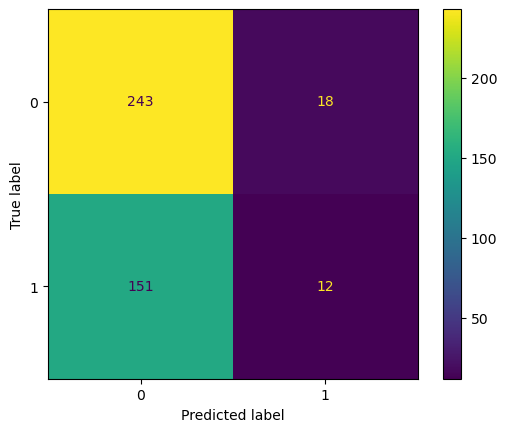

- Accuracy score: 0.6014
- Precision score: 0.4000
- Recall score: 0.0736
- F1 score: 0.1244

Decision Tree results:


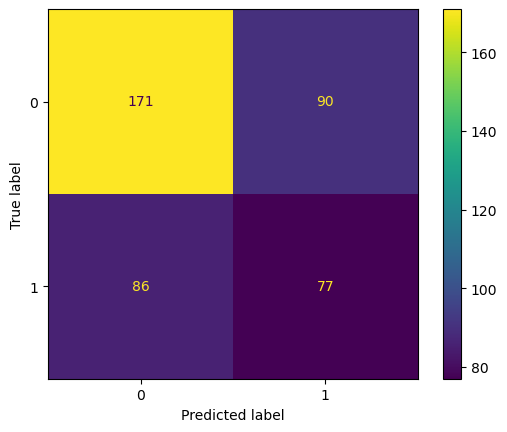

- Accuracy score: 0.5849
- Precision score: 0.4611
- Recall score: 0.4724
- F1 score: 0.4667

Random Forest results:


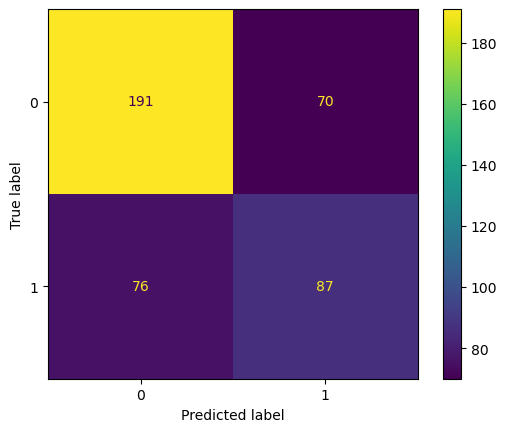

- Accuracy score: 0.6557
- Precision score: 0.5541
- Recall score: 0.5337
- F1 score: 0.5437

Gaussian N-B results:


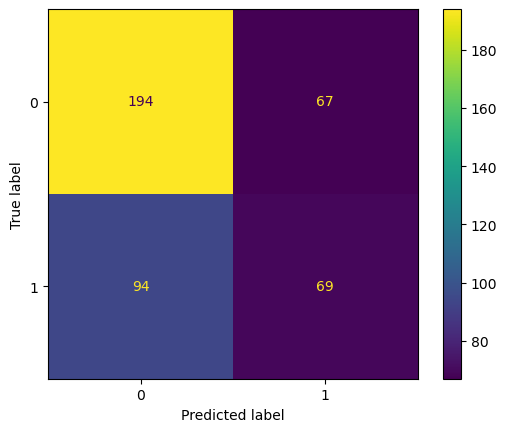

- Accuracy score: 0.6203
- Precision score: 0.5074
- Recall score: 0.4233
- F1 score: 0.4615

Logistic Regression results:


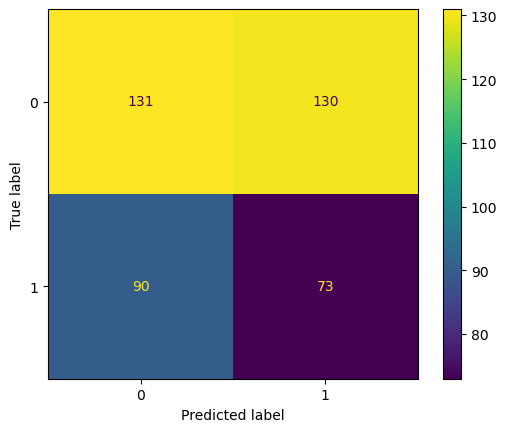

- Accuracy score: 0.4811
- Precision score: 0.3596
- Recall score: 0.4479
- F1 score: 0.3989

Gradient Boosting results:


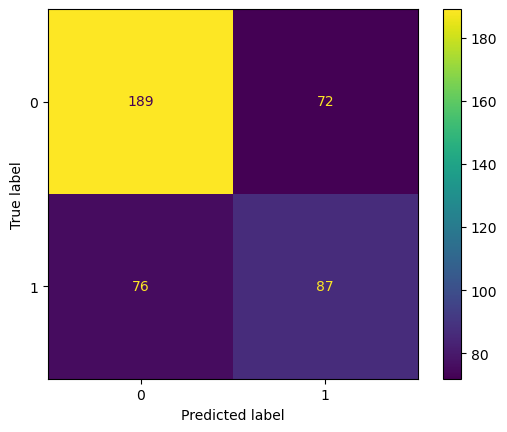

- Accuracy score: 0.6509
- Precision score: 0.5472
- Recall score: 0.5337
- F1 score: 0.5404



,Classifiers,Original dataset,Oversampled dataset
0,KNN,0.342007,0.440476
1,SVM,0.000000,0.124352
2,Decision Tree,0.522013,0.466667
3,Random Forest,0.472325,0.543750
4,Gaussian N-B,0.290909,0.461538
5,Logistic Regression,0.000000,0.398907
6,Gradient Boosting,0.410042,0.540373


In [79]:
for key in models:
    acc, pre, rec, f1 = get_results(key, models[key], X_train_over, X_test, y_train_over, y_test)
    acc_over_res.append(acc)
    pre_over_res.append(pre)
    rec_over_res.append(rec)
    f1_over_res.append(f1)


df_f1_over_comp = pd.DataFrame({'Classifiers':clfs, 'Original dataset':f1_res, 'Oversampled dataset':f1_over_res})
df_f1_over_comp

In [ ]:
df_res_over_comp = pd.DataFrame({'Classifiers':clfs, 'F1 Score':f1_over_res, 'Accuracy':acc_over_res, 'Precision':pre_over_res, 'Recall':rec_over_res})
df_res_over_comp